In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [29]:
water_bodies_df = pd.read_csv("water_bodies.csv")
print(water_bodies_df.head(64))

    Unnamed: 0                                               Name  Longitude  \
0            0  USGS 01094450 NORTH NASHUA RIR AT NORTH LOMINS... -71.746389   
1            1     USGS 01094455 NORTH NASHUA RIR AT LOMINSTR, MA -71.737222   
2            2     USGS 01094950 STILLWATR RIR AT WST STRLING, MA -71.818611   
3            3               USGS 01095920 NASHUA RIR NAR AYR, MA -71.609722   
4            4        USGS 01096603 ASSABT RIR NAR WSTBOROUGH, MA -71.638611   
..         ...                                                ...        ...   
59          59  USGS 011006065 SHAWSHN RIR AT BRIDG STRT NR TW... -71.195122   
60          60  USGS 01108050 SAWMILL BROOK AT CONANT ST BRIDG... -70.958792   
61          61  USGS 01108055 SAWMILL BROOK AT ROUT 28, BRIDGW... -70.968575   
62          62        USGS 011006712 MRRIMACK RIR NAR HARHILL, MA -71.086911   
63          63  USGS 01107102 TOWN RIR AT HAYWARD ST, BRIDGWAT... -70.953675   

     Latitude   PFHxS   PFOA   PFOS   P

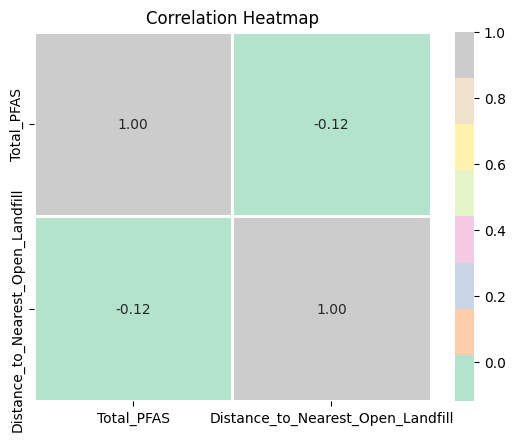

In [30]:


selected_columns = water_bodies_df[['Total_PFAS', 'Distance_to_Nearest_Open_Landfill']]

sns.heatmap(selected_columns.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')

plt.show()

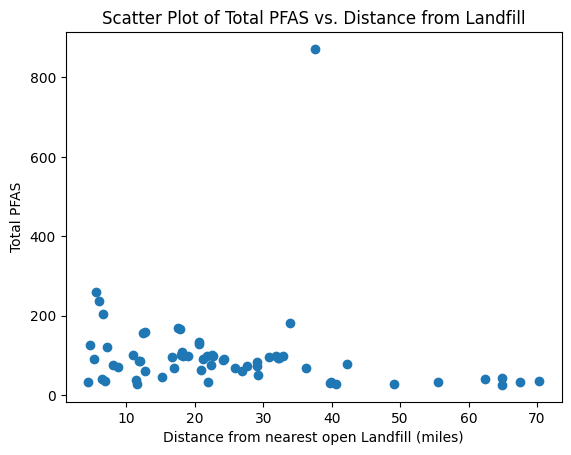

In [31]:
plt.scatter(water_bodies_df['Distance_to_Nearest_Open_Landfill'], water_bodies_df['Total_PFAS'])
plt.xlabel('Distance from nearest open Landfill (miles)')
plt.ylabel('Total PFAS')
plt.title('Scatter Plot of Total PFAS vs. Distance from Landfill')
plt.show()

In [32]:
#THIS REMOVES MERRIMACK, LAWRENCE BC ITS AN OUTLIER 

outliers = water_bodies_df[water_bodies_df['Total_PFAS'] > 800]
print(outliers)
# Update the original DataFrame to exclude the outlier
water_bodies_df = water_bodies_df[water_bodies_df['Total_PFAS'] <= 800]

# Confirm the outlier is removed
print(water_bodies_df.describe())


    Unnamed: 0                                      Name  Longitude  \
13          13  USGS 01100500 MRRIMACK RIR AT LAWRNC, MA -71.153139   

     Latitude  PFHxS  PFOA  PFOS  PFBS  PFBA  PFDS  ...  PFTRDA  PFuNDA  \
13  42.704833   50.0   7.7  50.0  50.0  50.0  50.0  ...    50.0    50.0   

    Total_PFAS  Nearest_Landfill  Distance_miles  \
13       871.6             10660        4.368842   

    Num_Landfills_within_7_miles  \
13                             1   

                                Nearest_open_landfill  \
13  Unnamed: 0                          21\nLatitu...   

    Distance_to_Nearest_Open_Landfill  Nearest_Airport  \
13                          37.575941               51   

    Distance_to_airport_in_miles  
13                      1.717045  

[1 rows x 31 columns]
       Unnamed: 0  Longitude   Latitude      PFHxS       PFOA       PFOS  \
count   63.000000  63.000000  63.000000  63.000000  63.000000  63.000000   
mean    31.793651 -71.725821  42.332722   3.245460 

In [33]:
print(selected_columns.corr())

                                   Total_PFAS  \
Total_PFAS                           1.000000   
Distance_to_Nearest_Open_Landfill   -0.119832   

                                   Distance_to_Nearest_Open_Landfill  
Total_PFAS                                                 -0.119832  
Distance_to_Nearest_Open_Landfill                           1.000000  


In [34]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = water_bodies_df[['Distance_to_Nearest_Open_Landfill']]  # Independent variable(s)
y = water_bodies_df['Total_PFAS']  # Dependent variable

model = LinearRegression()
model.fit(X, y)

# Coefficients and intercept
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Predictions
predictions = model.predict(X)
print(predictions)

Coefficient: [-1.37227371]
Intercept: 121.5898471195566
[114.0371231  113.36119123 112.77809386 104.02755946  92.97778154
  96.46035294  91.62786012  88.25024648  88.55247973  90.98485371
  90.70040561  81.7606086   81.37673399  77.24782892  79.24309625
 109.51919724  92.50030339  93.2594093   66.99750125  66.89268667
  91.52152702  65.77809959  54.11531792  35.86793936  32.61281158
  28.9391136   96.74492907 105.76393918  83.67032732  81.64000503
  93.29014582  96.91105502  84.63795303 100.80487108  71.92901158
 106.43901816 104.10895245 105.96366973  45.36921137 114.26071554
  32.58312123  95.43648504 112.59032217  98.7490267   98.24292085
 115.08028452 115.5144857   77.53277678  77.88150188  76.37044755
  97.11288923  97.45967383 105.29072516 105.10364045 104.48155623
  86.06185413  25.12073737  90.48042047  75.1313999  112.05640208
 111.64842872  63.54533446 110.59363873]


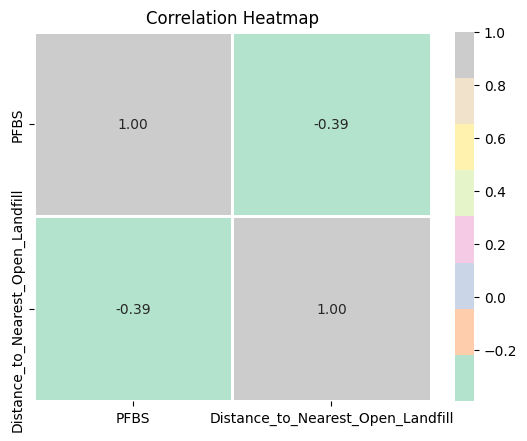

In [35]:
selected_columns = water_bodies_df[['PFBS', 'Distance_to_Nearest_Open_Landfill']]

sns.heatmap(selected_columns.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')

plt.show()

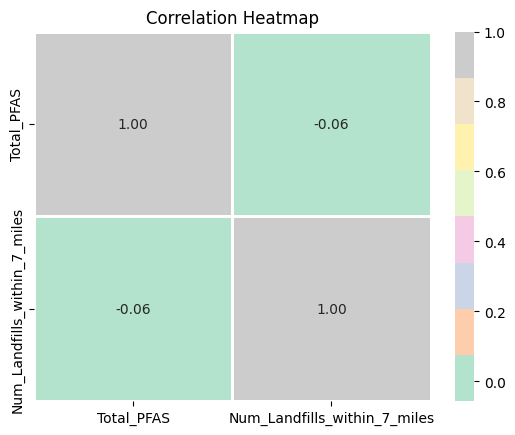

In [36]:
selected_columns = water_bodies_df[['Total_PFAS', 'Num_Landfills_within_7_miles']]

sns.heatmap(selected_columns.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')

plt.show()

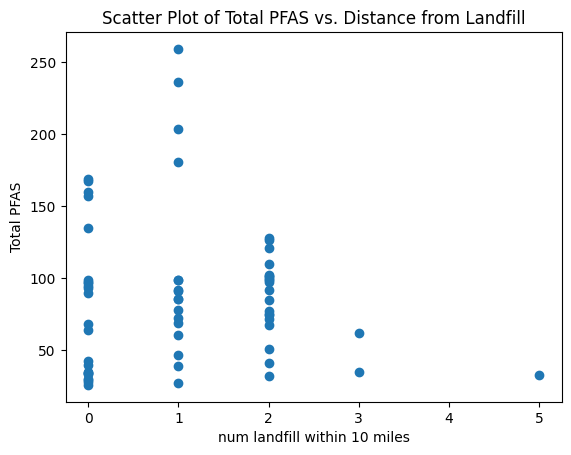

In [37]:
import matplotlib.pyplot as plt

plt.scatter(water_bodies_df['Num_Landfills_within_7_miles'], water_bodies_df['Total_PFAS'])
plt.xlabel('num landfill within 10 miles')
plt.ylabel('Total PFAS')
plt.title('Scatter Plot of Total PFAS vs. Distance from Landfill')
plt.show()

In [38]:
!pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [39]:
import pandas as pd
import statsmodels.api as sm

X = water_bodies_df[['Distance_to_Nearest_Open_Landfill']]
y = water_bodies_df['Total_PFAS']

X_clean = X.dropna()
y_clean = y[X_clean.index]  

X_clean = sm.add_constant(X_clean)

model = sm.OLS(y_clean, X_clean).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Total_PFAS   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     15.61
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           0.000204
Time:                        22:24:28   Log-Likelihood:                -329.09
No. Observations:                  63   AIC:                             662.2
Df Residuals:                      61   BIC:                             666.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [40]:
#some notes: 1) look at the recently downloaded excel sheet: it has the screening values for water pfas - can be used to calculate a hazard index 
#which could tell users which area is more dangerous etc. 2) add airplanes alongside landfills...

In [41]:
y = water_bodies_df['Total_PFAS']  

X = water_bodies_df[['Distance_to_Nearest_Open_Landfill', 'Distance_to_airport_in_miles']]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Total_PFAS   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     10.63
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           0.000112
Time:                        22:24:28   Log-Likelihood:                -326.72
No. Observations:                  63   AIC:                             659.4
Df Residuals:                      60   BIC:                             665.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

NameError: name 'X_train' is not defined